In [2]:
!pip install statsmodels



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [4]:
df = pd.read_csv('tips (data for regression problem).csv') 


In [5]:
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [7]:
print(df.describe())


       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


ENCODING THE CATEGORICAL COLUMNS TO NUMERICAL COLUMNS 

In [8]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = df_encoded.drop(columns=['tip'])
y = df_encoded['tip']


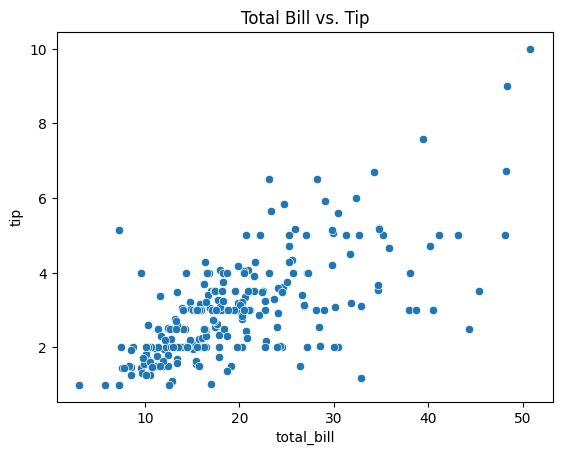

In [9]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs. Tip')
plt.show()

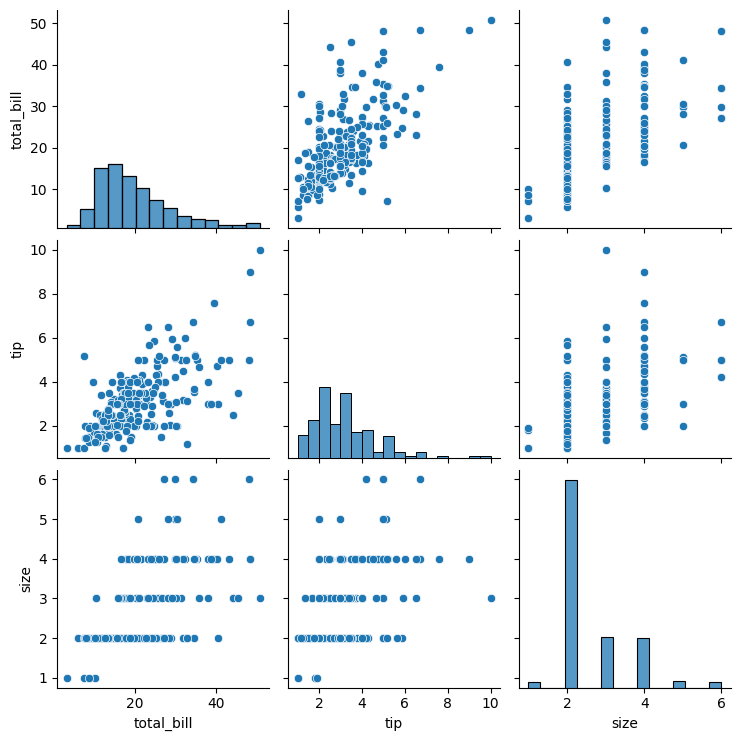

In [10]:
sns.pairplot(df)
plt.show()

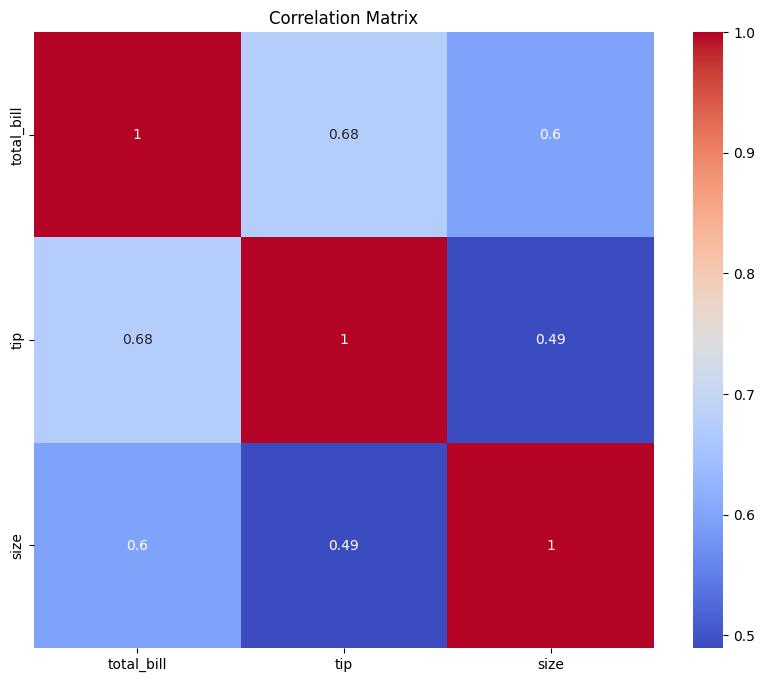

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [33]:

X = sm.add_constant(df[['total_bill', 'size']])  
y = df['tip']
model = sm.OLS(y, X).fit()
print('Rainbow Test:', linear_rainbow(model))


Rainbow Test: (np.float64(1.1902656646832817), np.float64(0.17048935693447642))


Rainbow Test p-value gives an indication of non-linear relationships, meaning non-linear models may perform better on this dataset.

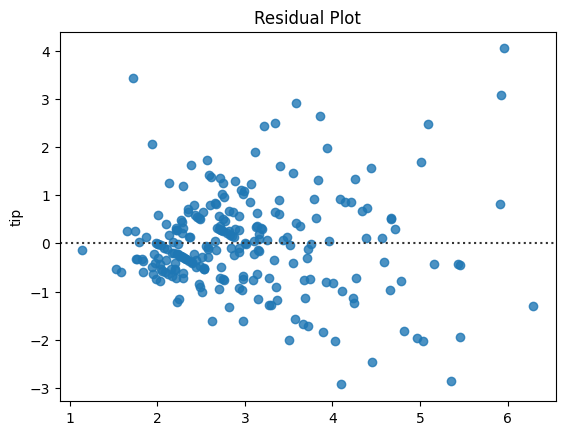

In [13]:
sns.residplot(x=model.predict(X), y=y)
plt.title('Residual Plot')
plt.show()

In [25]:

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                                MAE       MSE      RMSE        R2
Linear Regression          0.667133  0.703357  0.838664  0.437302
Ridge Regression           0.666538  0.700748  0.837107  0.439389
Lasso Regression           0.625610  0.566598  0.752727  0.546712
Decision Tree              0.852449  1.188512  1.090189  0.049168
Random Forest              0.727514  0.860426  0.927591  0.311643
Support Vector Regression  0.567986  0.532376  0.729641  0.574089
K-Nearest Neighbors        0.718857  0.876373  0.936148  0.298886


In [30]:
k = 5

cross_val_results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_const, y, cv=k, scoring='r2')
    cross_val_results[name] = {
        'Mean CV R2': cv_scores.mean(),
        'Std Dev CV R2': cv_scores.std()
    }
cv_results_df = pd.DataFrame(cross_val_results).T
print("Cross-Validation Results (R² Scores):")
print(cv_results_df)


Cross-Validation Results (R² Scores):
                           Mean CV R2  Std Dev CV R2
Linear Regression            0.421493       0.135312
Ridge Regression             0.423291       0.134530
Lasso Regression             0.449595       0.111509
Decision Tree                0.066550       0.174131
Random Forest                0.392806       0.098607
Support Vector Regression    0.430408       0.156285
K-Nearest Neighbors          0.296290       0.110834


Form the aboove table, we see that support vector regression gives the best result like the lowest MSE and the highest value for R2. We can conclude from here that SUPPORT VECTOR REGRESSION is the best suited model for predicting the tips in this dataset.

In [31]:

param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'Support Vector Regression': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 10]
    }
}
best_models = {}

for model_name, param_grid in param_grids.items():
    grid_search = GridSearchCV(models[model_name], param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
tuned_results = {}

for name, model in best_models.items():
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    tuned_results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
tuned_results_df = pd.DataFrame(tuned_results).T
print("Tuned Model Performance Comparison:")
print(tuned_results_df)


Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best parameters for Support Vector Regression: {'C': 0.1, 'kernel': 'linear'}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 10}
Tuned Model Performance Comparison:
                                MAE       MSE      RMSE        R2
Random Forest              0.745861  0.888007  0.942341  0.289578
Support Vector Regression  0.649558  0.654258  0.808862  0.476582
K-Nearest Neighbors        0.659510  0.693553  0.832798  0.445145


Feature Importance (Random Forest):
total_bill    0.767043
smoker_Yes    0.069417
size          0.058045
day_Sat       0.030292
day_Sun       0.025223
sex_Male      0.025187
time_Lunch    0.012975
day_Thur      0.011818
dtype: float64


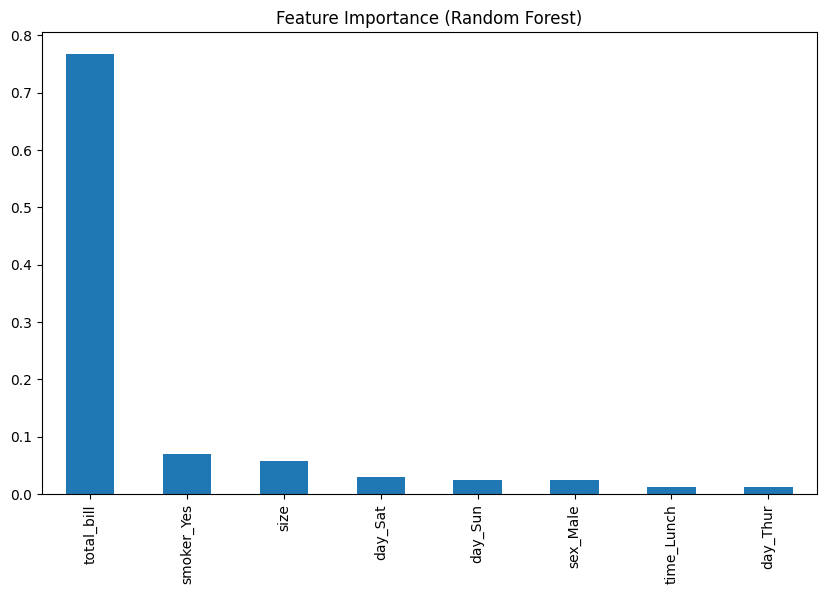

In [32]:

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_feature_importance = rf_feature_importance.sort_values(ascending=False)

print("Feature Importance (Random Forest):")
print(rf_feature_importance)

rf_feature_importance.plot(kind='bar', title='Feature Importance (Random Forest)', figsize=(10, 6))
plt.show()


Feature Importance (Lasso Regression):
size          0.108081
total_bill    0.099099
sex_Male      0.000000
smoker_Yes    0.000000
day_Sat       0.000000
day_Sun       0.000000
day_Thur      0.000000
time_Lunch    0.000000
dtype: float64


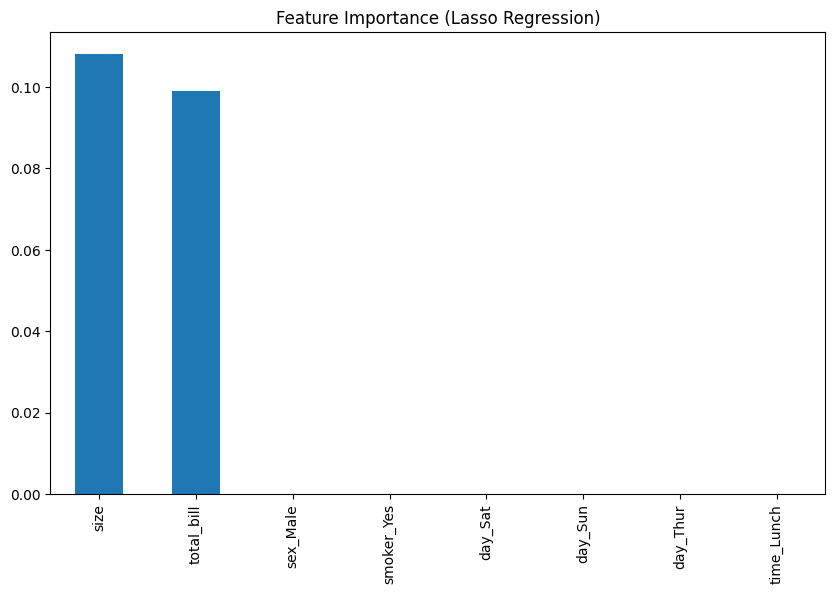

In [37]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_feature_importance = pd.Series(lasso_model.coef_, index=X_train.columns)
lasso_feature_importance = lasso_feature_importance.abs().sort_values(ascending=False)

print("Feature Importance (Lasso Regression):")
print(lasso_feature_importance)
lasso_feature_importance.plot(kind='bar', title='Feature Importance (Lasso Regression)', figsize=(10, 6))
plt.show()

Significant Factors Impacting Tips:
Total Bill and Party Size: Strongly correlate with tip amounts as seen from the above correlation matrix, suggesting customers tend to tip more when the bill or group size is larger.
Meal Time: Patterns in tipping may vary based on whether the meal is lunch or dinner.


Suggested Techniques: Improvement of Services At Busiest Times: To get as many recommendations as possible, concentrate on serving dinner parties or larger gatherings with exceptional service. Individualised Suggestions: Improve service interactions by using the model's findings to advise employees on appropriate tipping practices depending on party composition and bill size.